In [1]:
import pickle
import numpy as np

with open('realworld_mobiact.pkl', 'rb') as f:
    x, y, k = pickle.load(f)

print(x.shape, y.shape, k.shape)
print(np.unique(y))
print(np.unique(k))

(22599, 3, 128) (22599,) (22599,)
[0 1 2 3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75]


In [2]:
quaternions = [
    [1, 0, 0, 0],  # 0° rotation (identity)
    [0.7071, 0.7071, 0, 0],  # 90° rotation around x-axis
    [0.7071, 0, 0.7071, 0],  # 90° rotation around y-axis
    [0.7071, 0, 0, 0.7071],  # 90° rotation around z-axis
    [0.7071, -0.7071, 0, 0],  # -90° rotation around x-axis
    [0.7071, 0, -0.7071, 0],  # -90° rotation around y-axis
    [0.7071, 0, 0, -0.7071],  # -90° rotation around z-axis
    [0, 1, 0, 0],  # 180° rotation around x-axis
    [0, 0, 1, 0],  # 180° rotation around y-axis
    [0, 0, 0, 1],  # 180° rotation around z-axis
    [0.5, 0.5, 0.5, 0.5],  # 90° rotation around xy-axis
    [0.5, 0.5, 0.5, -0.5],  # 90° rotation around xz-axis
    [0.5, -0.5, 0.5, 0.5],  # 90° rotation around yz-axis
    [0.5, -0.5, -0.5, 0.5],  # -90° rotation around xy-axis
    [0.5, 0.5, -0.5, -0.5],  # -90° rotation around xz-axis
    [0.5, -0.5, 0.5, -0.5],  # -90° rotation around yz-axis
]

min_diff = np.inf
min_q = 0

for q in quaternions:
    print("Quaternion q:")
    print(q)

    xr = x[k < 15]
    yr = y[k < 15]
    kr = k[k < 15]

    xm = x[k >= 15]
    ym = y[k >= 15]
    km = k[k >= 15]

    q = np.array(q)
    q = q / np.linalg.norm(q)

    # Extract the components of the quaternion
    q0, q1, q2, q3 = q

    # Define the rotation matrix R
    R = np.array([
        [1 - 2*(q2**2 + q3**2), 2*(q1*q2 - q0*q3), 2*(q1*q3 + q0*q2)],
        [2*(q1*q2 + q0*q3), 1 - 2*(q1**2 + q3**2), 2*(q2*q3 - q0*q1)],
        [2*(q1*q3 - q0*q2), 2*(q2*q3 + q0*q1), 1 - 2*(q1**2 + q2**2)]
    ])

    print("Rotation Matrix R:")
    print(R)

    min_val, max_val = -19.61, 19.61
    xr = xr * (max_val - min_val) + min_val
    xr = np.dot(xr.transpose(0, 2, 1), R).transpose(0, 2, 1)
    print(xr.shape)
    xr = (xr - min_val) / (max_val - min_val)

    # Compute the means of xr for each of the three channels
    mean_xr = np.mean(xr, axis=(0, 2))

    # Compute the means of xm for each of the three channels
    mean_xm = np.mean(xm, axis=(0, 2))

    # Round the means to two decimal places
    mean_xr_rounded = np.around(mean_xr, decimals=4)
    mean_xm_rounded = np.around(mean_xm, decimals=4)

    print("Means of xr:", mean_xr_rounded)
    print("Means of xm:", mean_xm_rounded)

    diff = np.mean(np.abs(mean_xr - mean_xm))
    print(f'{diff:.4f}')

    if diff < min_diff:
        min_q = q
        min_diff = diff


    print('\n\n')

print("Best q:")
print(min_q)
print("Best diff:")
print(min_diff)

Quaternion q:
[1, 0, 0, 0]
Rotation Matrix R:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
(11783, 3, 128)
Means of xr: [0.7223 0.5003 0.4985]
Means of xm: [0.5036 0.6841 0.5113]
0.1384



Quaternion q:
[0.7071, 0.7071, 0, 0]
Rotation Matrix R:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.22044605e-16 -1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -2.22044605e-16]]
(11783, 3, 128)
Means of xr: [0.7223 0.4985 0.4997]
Means of xm: [0.5036 0.6841 0.5113]
0.1386



Quaternion q:
[0.7071, 0, 0.7071, 0]
Rotation Matrix R:
[[-2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00 -2.22044605e-16]]
(11783, 3, 128)
Means of xr: [0.5015 0.5003 0.7223]
Means of xm: [0.5036 0.6841 0.5113]
0.1323



Quaternion q:
[0.7071, 0, 0, 0.7071]
Rotation Matrix R:
[[-2.22044605e-16 -1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -2.22044605e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000

In [3]:
import numpy as np

q = [0.5, 0.5, 0.5, -0.5]

# Ensure q is a unit quaternion
q = np.array(q)
q = q / np.linalg.norm(q)

# Extract the components of the quaternion
q0, q1, q2, q3 = q

# Define the rotation matrix R
R = np.array([
    [1 - 2*(q2**2 + q3**2), 2*(q1*q2 - q0*q3), 2*(q1*q3 + q0*q2)],
    [2*(q1*q2 + q0*q3), 1 - 2*(q1**2 + q3**2), 2*(q2*q3 - q0*q1)],
    [2*(q1*q3 - q0*q2), 2*(q2*q3 + q0*q1), 1 - 2*(q1**2 + q2**2)]
])

print("Rotation Matrix R:")
print(R)

Rotation Matrix R:
[[ 0.  1.  0.]
 [ 0.  0. -1.]
 [-1.  0.  0.]]


In [4]:
xr = x[k < 15]
yr = y[k < 15]
kr = k[k < 15]

xm = x[k >= 15]
ym = y[k >= 15]
km = k[k >= 15]

print(f'Realworld: {xr.shape}, {yr.shape}, {kr.shape}')
print(np.unique(yr))
print(np.unique(kr))

print(f'Mobiact: {xm.shape}, {ym.shape}, {km.shape}')
print(np.unique(ym))
print(np.unique(km))

Realworld: (11783, 3, 128), (11783,), (11783,)
[0 1 2 3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Mobiact: (10816, 3, 128), (10816,), (10816,)
[0 1 2 3]
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75]


In [5]:
min_val, max_val = -19.61, 19.61

xr = xr * (max_val - min_val) + min_val

xr = np.dot(xr.transpose(0, 2, 1), R).transpose(0, 2, 1)
print(xr.shape)

xr = (xr - min_val) / (max_val - min_val)

(11783, 3, 128)


In [6]:
import numpy as np

# Assuming xr and xm are already defined with shapes (N1, 3, 128) and (N2, 3, 128) respectively

# Compute the means of xr for each of the three channels
mean_xr = np.mean(xr, axis=(0, 2))

# Compute the means of xm for each of the three channels
mean_xm = np.mean(xm, axis=(0, 2))

# Round the means to two decimal places
mean_xr_rounded = np.around(mean_xr, decimals=4)
mean_xm_rounded = np.around(mean_xm, decimals=4)

print("Means of xr:", mean_xr_rounded)
print("Means of xm:", mean_xm_rounded)

Means of xr: [0.5015 0.7223 0.4997]
Means of xm: [0.5036 0.6841 0.5113]


In [7]:
x = np.concatenate([xr, xm], axis=0)
print(x.shape)

(22599, 3, 128)


In [8]:
# Save the data to a pickle file
with open('realworld_mobiact_rot.pkl', 'wb') as f:
    pickle.dump((x, y, k), f)

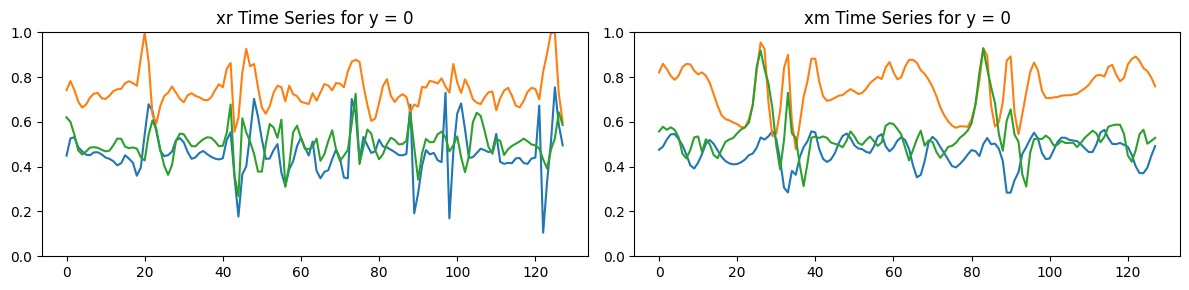

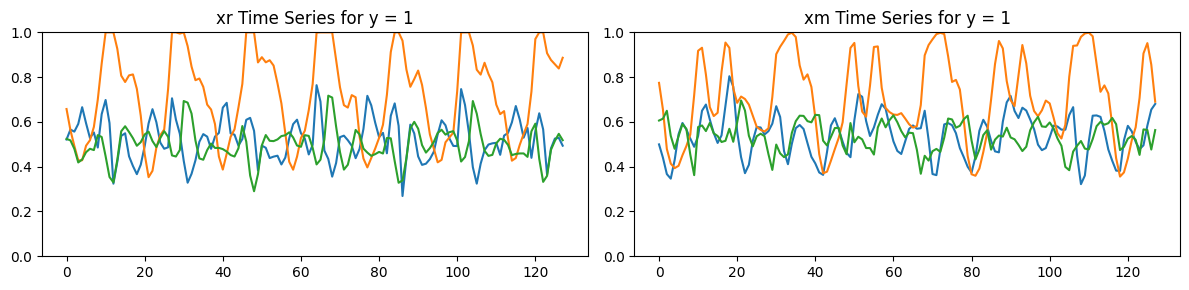

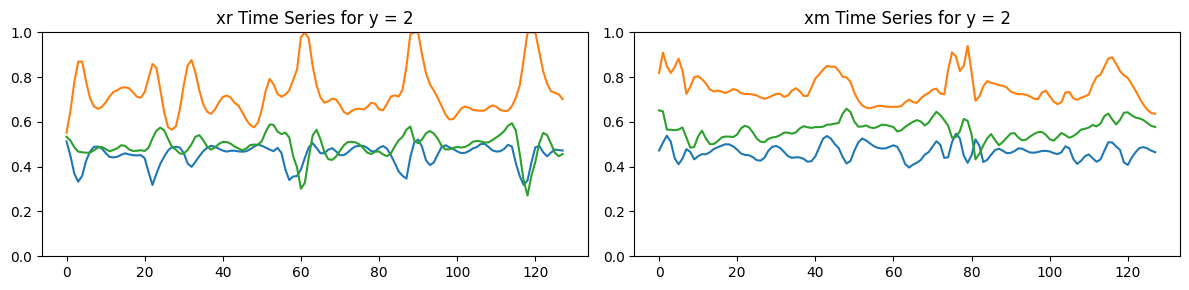

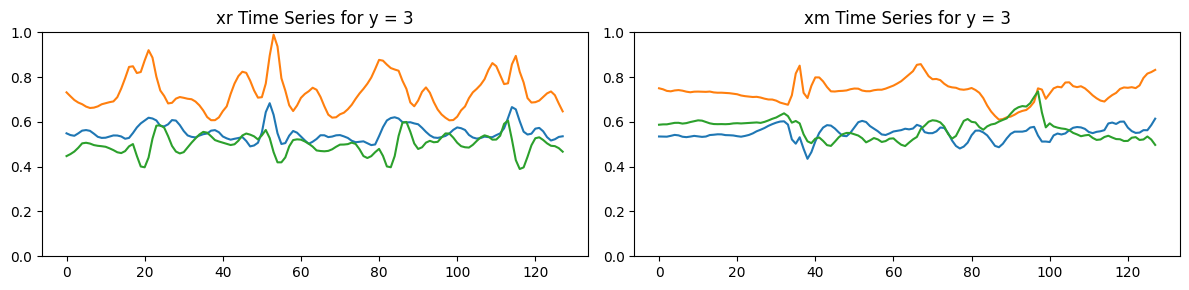

In [9]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(271022)

# Assuming xr, yr, xm, ym are already defined as in the provided code

unique_yr = np.unique(yr)
unique_ym = np.unique(ym)

# Ensure unique_yr and unique_ym have the same unique values
assert np.array_equal(unique_yr, unique_ym), "Unique values of yr and ym do not match"

# Plotting a random time series of xr and xm side by side for each unique value of y
for value in unique_yr:
    indices_r = np.where(yr == value)[0]
    indices_m = np.where(ym == value)[0]
    
    random_idx_r = np.random.choice(indices_r)
    random_idx_m = np.random.choice(indices_m)
    
    plt.figure(figsize=(12, 3))
    
    # Plotting xr time series
    plt.subplot(1, 2, 1)
    ts = xr[random_idx_r].T
    for ch in range(ts.shape[1]):
        plt.plot(ts[:,ch])
    plt.title(f'xr Time Series for y = {value}')
    plt.ylim(0, 1)
    
    # Plotting xm time series
    plt.subplot(1, 2, 2)
    ts = xm[random_idx_m].T
    for ch in range(ts.shape[1]):
        plt.plot(ts[:,ch])
    plt.title(f'xm Time Series for y = {value}')
    plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

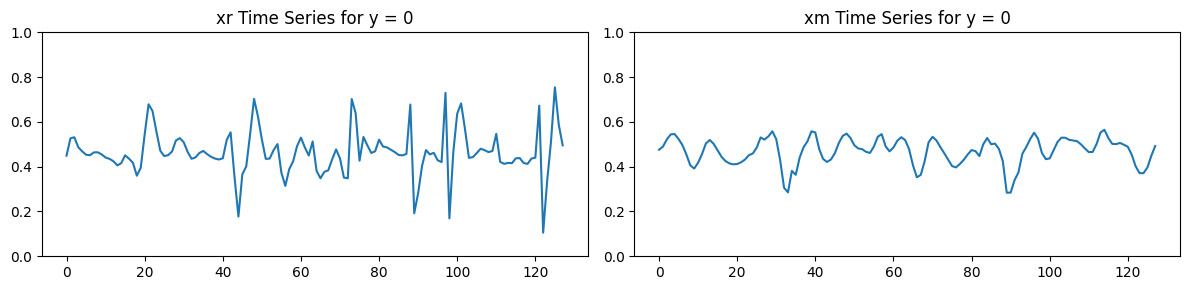

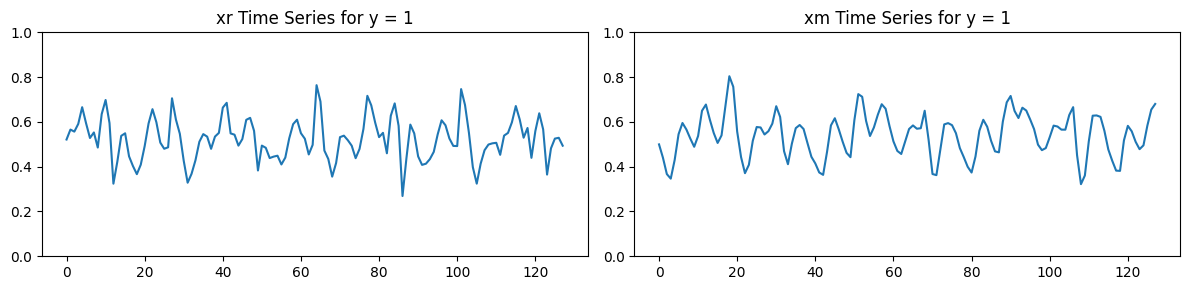

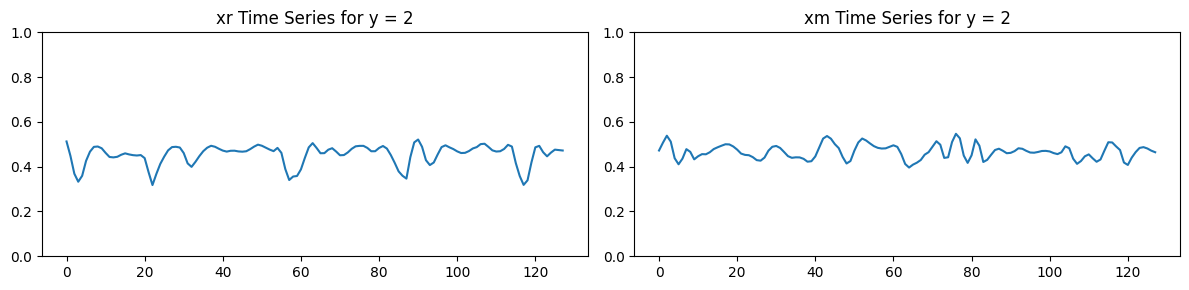

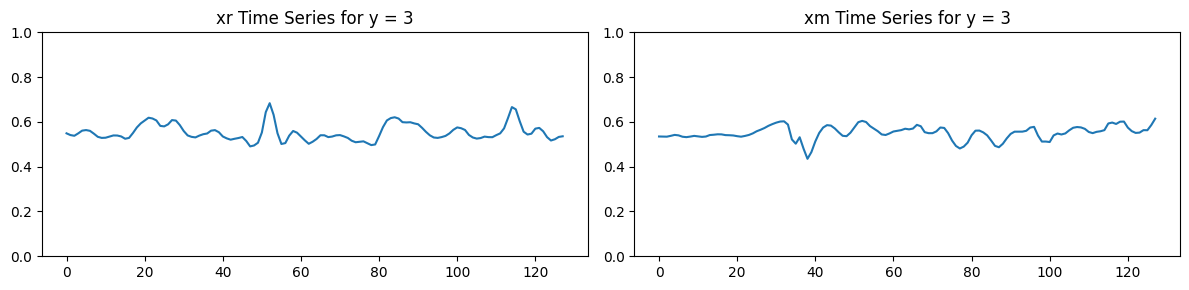

In [10]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(271022)

# Assuming xr, yr, xm, ym are already defined as in the provided code

unique_yr = np.unique(yr)
unique_ym = np.unique(ym)

# Ensure unique_yr and unique_ym have the same unique values
assert np.array_equal(unique_yr, unique_ym), "Unique values of yr and ym do not match"

# Plotting a random time series of xr and xm side by side for each unique value of y
for value in unique_yr:
    indices_r = np.where(yr == value)[0]
    indices_m = np.where(ym == value)[0]
    
    random_idx_r = np.random.choice(indices_r)
    random_idx_m = np.random.choice(indices_m)
    
    plt.figure(figsize=(12, 3))
    
    # Plotting xr time series
    plt.subplot(1, 2, 1)
    ts = xr[random_idx_r].T
    plt.plot(ts[:, 0])
    plt.title(f'xr Time Series for y = {value}')
    plt.ylim(0, 1)
    
    # Plotting xm time series
    plt.subplot(1, 2, 2)
    ts = xm[random_idx_m].T
    plt.plot(ts[:, 0])
    plt.title(f'xm Time Series for y = {value}')
    plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

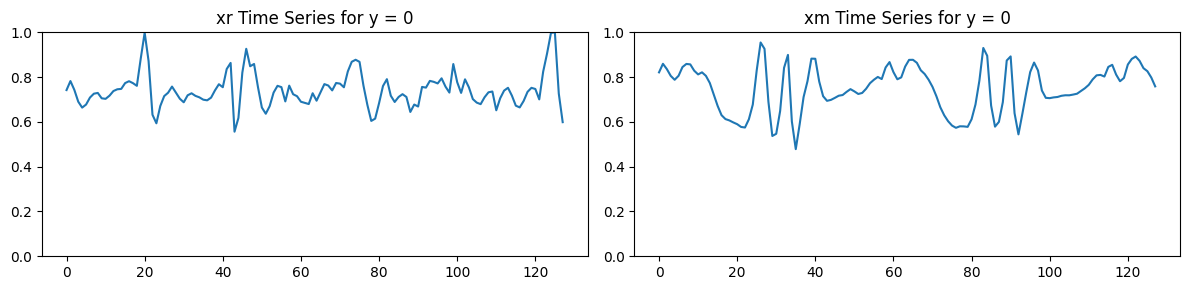

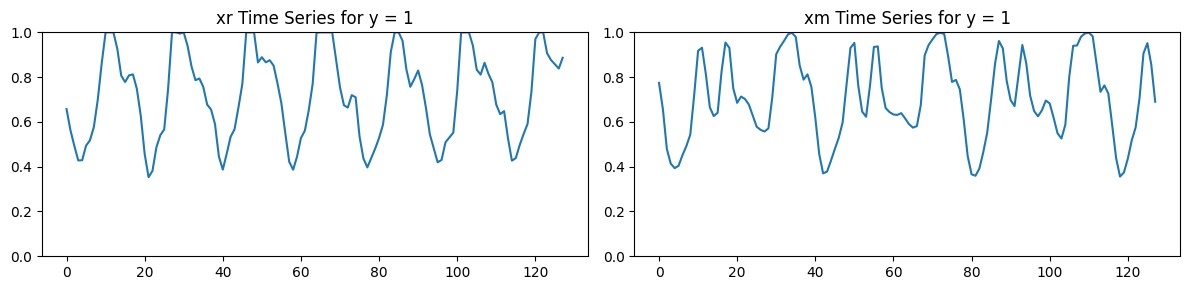

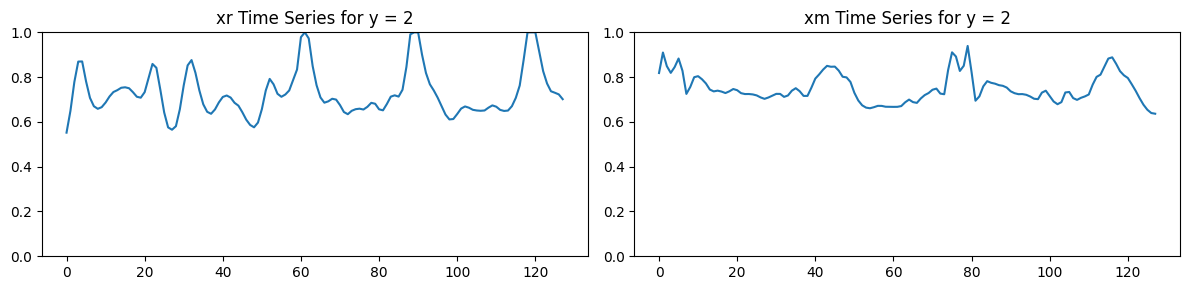

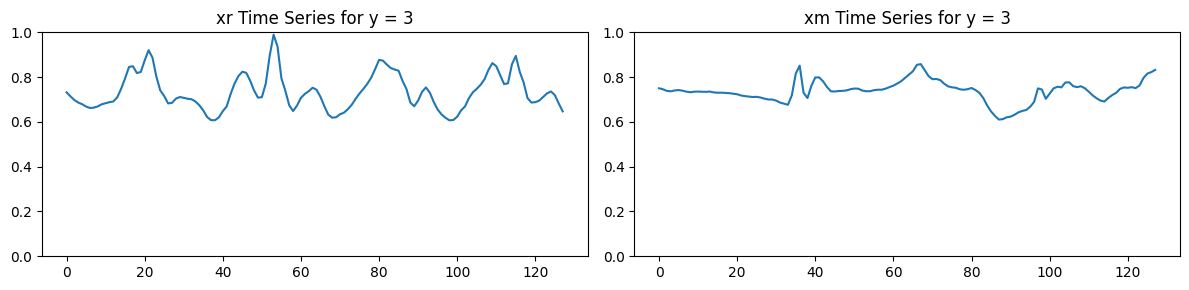

In [11]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(271022)

# Assuming xr, yr, xm, ym are already defined as in the provided code

unique_yr = np.unique(yr)
unique_ym = np.unique(ym)

# Ensure unique_yr and unique_ym have the same unique values
assert np.array_equal(unique_yr, unique_ym), "Unique values of yr and ym do not match"

# Plotting a random time series of xr and xm side by side for each unique value of y
for value in unique_yr:
    indices_r = np.where(yr == value)[0]
    indices_m = np.where(ym == value)[0]
    
    random_idx_r = np.random.choice(indices_r)
    random_idx_m = np.random.choice(indices_m)
    
    plt.figure(figsize=(12, 3))
    
    # Plotting xr time series
    plt.subplot(1, 2, 1)
    ts = xr[random_idx_r].T
    plt.plot(ts[:, 1])
    plt.title(f'xr Time Series for y = {value}')
    plt.ylim(0, 1)
    
    # Plotting xm time series
    plt.subplot(1, 2, 2)
    ts = xm[random_idx_m].T
    plt.plot(ts[:, 1])
    plt.title(f'xm Time Series for y = {value}')
    plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

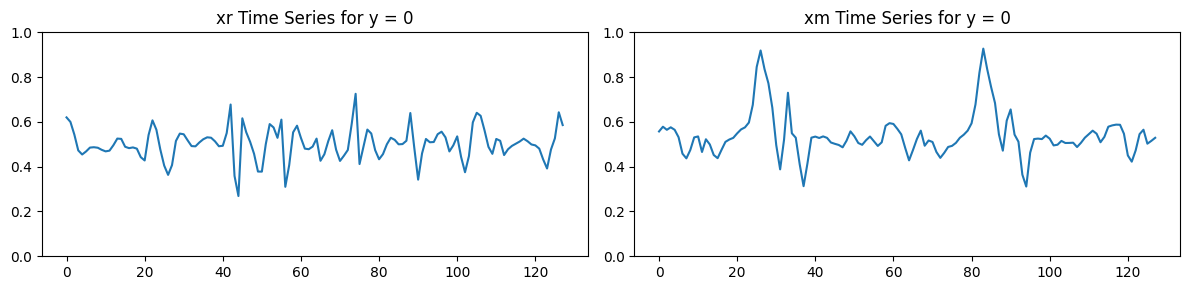

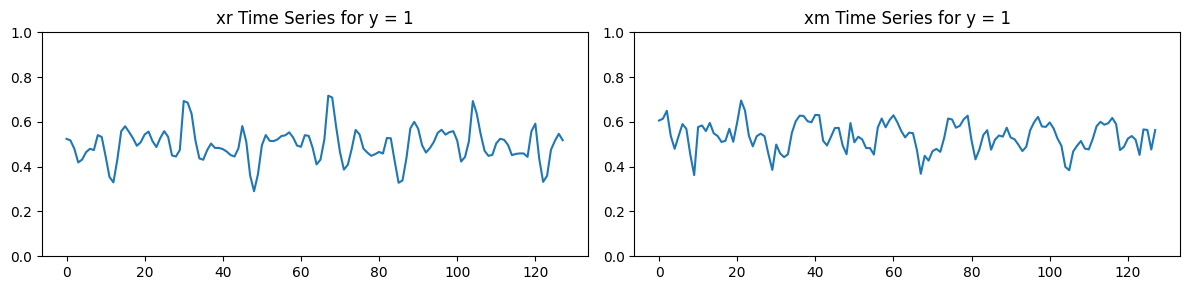

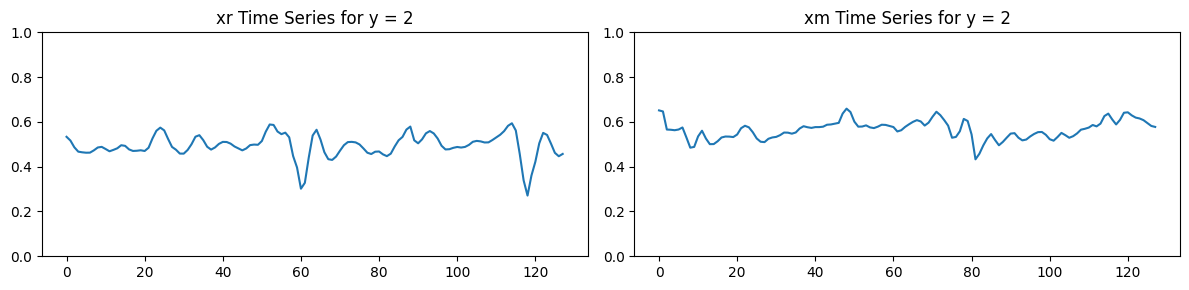

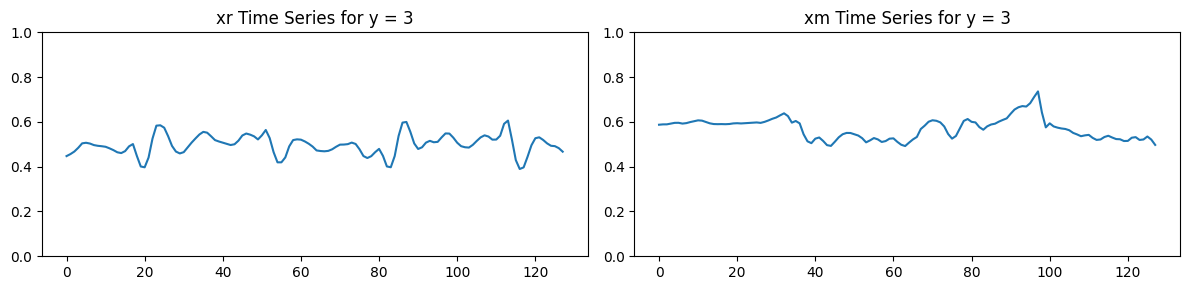

In [12]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(271022)

# Assuming xr, yr, xm, ym are already defined as in the provided code

unique_yr = np.unique(yr)
unique_ym = np.unique(ym)

# Ensure unique_yr and unique_ym have the same unique values
assert np.array_equal(unique_yr, unique_ym), "Unique values of yr and ym do not match"

# Plotting a random time series of xr and xm side by side for each unique value of y
for value in unique_yr:
    indices_r = np.where(yr == value)[0]
    indices_m = np.where(ym == value)[0]
    
    random_idx_r = np.random.choice(indices_r)
    random_idx_m = np.random.choice(indices_m)
    
    plt.figure(figsize=(12, 3))
    
    # Plotting xr time series
    plt.subplot(1, 2, 1)
    ts = xr[random_idx_r].T
    plt.plot(ts[:, 2])
    plt.title(f'xr Time Series for y = {value}')
    plt.ylim(0, 1)
    
    # Plotting xm time series
    plt.subplot(1, 2, 2)
    ts = xm[random_idx_m].T
    plt.plot(ts[:, 2])
    plt.title(f'xm Time Series for y = {value}')
    plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()